## 주요 내용
* [데이터 프레임 내의 타입 알아보기](#1.데이터-프레임-내의-타입-알아보기)
* [칼럼 정보를 조회](#2.칼럼-정보를-조회)
* [칼럼별로 null 값처리 ](#3.칼럼별로-null-값처리 )
* [칼럼별로 null 값처리 제거](#4.칼럼별로-null-값처리-제거)
* [중복값에 대한 제거](#5.중복값에-대한-제거)


In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.22.0'

In [3]:
import numpy as np

In [4]:
np.__version__

'1.14.5'

## 1.데이터 프레임 내의 타입 알아보기

###  영화 데이터를 가져온다

In [5]:
movie = pd.read_csv("./data/data/movie.csv")

####  칼럼정보를 검색한다

In [6]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### 데이터 프레임 내부의 칼럼별 data type에 대해 알아본다

    . 데이터프레임 내의 칼럼들에 구성된 데이터 타입을 확인한다. 

In [7]:
movie.get_dtype_counts()

float64    13
int64       3
object     12
dtype: int64

####  데이터 프레임 내부의 int64로 구성된 열만 추출한다.

     . 특정 데이터 타입을 가진 칼럼만 선택해서 새로운 데이터 프레임을 만든다.
     

In [8]:
movie.select_dtypes(include=['int64']).head()

num_voted_users  cast_total_facebook_likes  movie_facebook_likes
0           886204                       4834                 33000
1           471220                      48350                     0
2           275868                      11700                 85000
3          1144337                     106759                164000
4                8                        143                     0

### 숫자 타입의 칼럼을 전부 알아보기

      . 특정 숫자 타입을 전부 가져오려면 number로 처리한다.

In [9]:
movie.select_dtypes(include=['number']).head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
4                     NaN       NaN                    131.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
4                     NaN                   131.0          NaN   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   
1           471220                      48350                   0.0   
2           275868                      11700                   1.0   
3          1144337                     106759                   0.0   
4                8                        143                   0.0   

   num_user_for_reviews       budget  title_year  actor_2_facebook_likes  \
0                3054.0  237000000.0      2009.0                   936.0   
1                1238.0  300000000.0      2007.0                  5000.0   
2                 994.0  245000000.0      2015.0                   393.0   
3                2701.0  250000000.0      2012.0                 23000.0   
4                   NaN          NaN         NaN                    12.0   

   imdb_score  aspect_ratio  movie_facebook_likes  
0         7.9          1.78                 33000  
1         7.1          2.35                     0  
2         6.8          2.35                 85000  
3         8.5          2.35                164000  
4         7.1           NaN                     0

####  숫자 타입을 전부 가져오고 실제 칼럼이 동일한 지를 확인한다. 

In [10]:
movie.select_dtypes(include=['number']).columns.size

16

In [11]:
movie.get_dtype_counts()

float64    13
int64       3
object     12
dtype: int64

## 2.칼럼 정보를 조회

      . filter 메소드를 이용해서 칼럼 내의 문자열 처리를 한다.
         like 속성을 이용해서 문자열 처리
         정규표현식을 이용해서 특정 문자 포함여부 처리

### 칼럼 이름을 검색해서 동일한 like에 포함된 단어가 있는 경우 추출한다

In [12]:
movie.filter(like='facebook').head()

director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes  \
0                      0.0                   855.0                  1000.0   
1                    563.0                  1000.0                 40000.0   
2                      0.0                   161.0                 11000.0   
3                  22000.0                 23000.0                 27000.0   
4                    131.0                     NaN                   131.0   

   cast_total_facebook_likes  actor_2_facebook_likes  movie_facebook_likes  
0                       4834                   936.0                 33000  
1                      48350                  5000.0                     0  
2                      11700                   393.0                 85000  
3                     106759                 23000.0                164000  
4                        143                    12.0                     0

### 칼럼 이름에 숫자가 들어가 있는 경우를 검색하기 위해 regex를 이용도 가능하다

In [13]:
movie.filter(regex='\d').head()

actor_3_facebook_likes      actor_2_name  actor_1_facebook_likes  \
0                   855.0  Joel David Moore                  1000.0   
1                  1000.0     Orlando Bloom                 40000.0   
2                   161.0      Rory Kinnear                 11000.0   
3                 23000.0    Christian Bale                 27000.0   
4                     NaN        Rob Walker                   131.0   

      actor_1_name          actor_3_name  actor_2_facebook_likes  
0      CCH Pounder             Wes Studi                   936.0  
1      Johnny Depp        Jack Davenport                  5000.0  
2  Christoph Waltz      Stephanie Sigman                   393.0  
3        Tom Hardy  Joseph Gordon-Levitt                 23000.0  
4      Doug Walker                   NaN                    12.0

## 3.칼럼별로 null 값처리

      . 실제 필드에 널값이 들어있는 지를 확인하고 초기화 처리

### isnull 메소드를 이용해서 실제 내부에 결측값을 블리언으로 표시하고 sum을 이용해서 건수를 확인

       .  파이썬에서는 bool클래스는 int 클래스를 상속해서 만들어지므로 실제 True 값은 1로 처리되므로 이를 합산하면 결측값이 표시된다.

In [14]:
movie.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

#### 전체 널값을 합산하기

   . 데이터 프레임에서 결측값을 처리하면 각 칼럼별로 나온다. 다시 한번 sum 메소드를 처리하면 전체 널값이 갯수를 확인한다.

In [15]:
movie.isnull().sum().sum()

2654

###  object 타입에 대한 결측값 처리하기

#### object 타입에 대한 칼럼을 조회한다.

In [16]:
movie.get_dtype_counts()

float64    13
int64       3
object     12
dtype: int64

####  칼럼 내의 object 데이터 타입을 가져오고 그 내부의 칼럼을 조회

In [17]:
movie.select_dtypes(['object']).columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [18]:
movie.select_dtypes(['object']).columns.tolist()

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [19]:
movie.select_dtypes(['object']).head()

color      director_name      actor_2_name  \
0  Color      James Cameron  Joel David Moore   
1  Color     Gore Verbinski     Orlando Bloom   
2  Color         Sam Mendes      Rory Kinnear   
3  Color  Christopher Nolan    Christian Bale   
4    NaN        Doug Walker        Rob Walker   

                            genres     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
4                      Documentary      Doug Walker   

                                  movie_title          actor_3_name  \
0                                      Avatar             Wes Studi   
1    Pirates of the Caribbean: At World's End        Jack Davenport   
2                                     Spectre      Stephanie Sigman   
3                       The Dark Knight Rises  Joseph Gordon-Levitt   
4  Star Wars: Episode VII - The Force Awakens                   NaN   

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
4                                                NaN   

                                     movie_imdb_link language country  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...  English     USA   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...  English     USA   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...  English      UK   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...  English     USA   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...      NaN     NaN   

  content_rating  
0          PG-13  
1          PG-13  
2          PG-13  
3          PG-13  
4            NaN

### 문자열로 처리되므로 빈 문자열을 넣어서 처리

      . 문자열이므로 nan을 아무것도 없는 빈문자열로 처리한다.
      

#### 결측 값을 처리 이미지

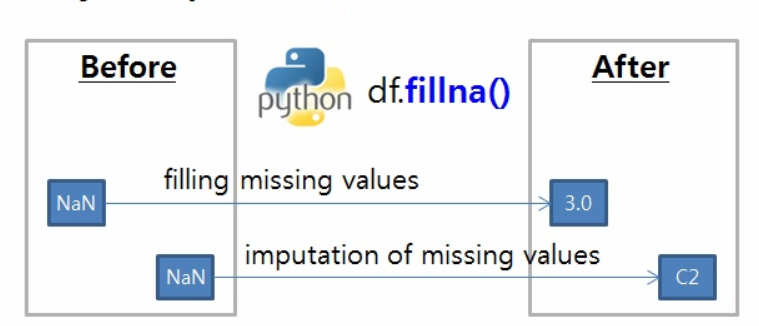

In [20]:
from  IPython.display import Image

Image("fillna_pic2.png")

#### object 칼럼을 가져와서 빈문자열로 처리

In [21]:
movie.select_dtypes(['object']).fillna('').head()

color      director_name      actor_2_name  \
0  Color      James Cameron  Joel David Moore   
1  Color     Gore Verbinski     Orlando Bloom   
2  Color         Sam Mendes      Rory Kinnear   
3  Color  Christopher Nolan    Christian Bale   
4               Doug Walker        Rob Walker   

                            genres     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
4                      Documentary      Doug Walker   

                                  movie_title          actor_3_name  \
0                                      Avatar             Wes Studi   
1    Pirates of the Caribbean: At World's End        Jack Davenport   
2                                     Spectre      Stephanie Sigman   
3                       The Dark Knight Rises  Joseph Gordon-Levitt   
4  Star Wars: Episode VII - The Force Awakens                         

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
4                                                      

                                     movie_imdb_link language country  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...  English     USA   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...  English     USA   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...  English      UK   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...  English     USA   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                    

  content_rating  
0          PG-13  
1          PG-13  
2          PG-13  
3          PG-13  
4

###  결측값 보간

#### 보간값은 결측값을 두정 값의 중간 값으로 처리

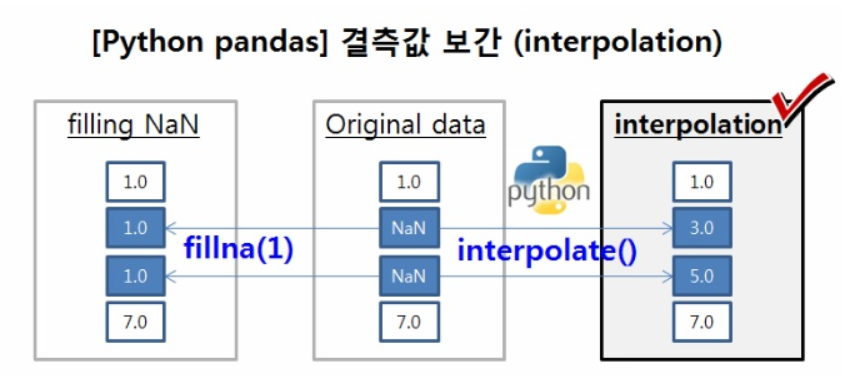

In [22]:
from  IPython.display import Image

Image("fillna_pic.png")

####  1과 3 사이이 보간값을 넣는다

In [23]:
s = pd.Series([0, 1, np.nan, 3])


In [24]:
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

## 4.칼럼별로 null 값처리 제거

     . 특정 칼럼별로 처리할 경우 삭제할 때는 dropna 로 처리

###  파일을 읽어온다

In [25]:
anime = pd.read_csv("./anime/anime.csv",encoding="utf-8")

In [26]:
anime.shape

(10486, 7)

#### 칼럼내의 원소들 개수를 확인한다.

     . null 값에 해당되는 것을 제외하고 개수를 표시한다.

In [27]:
anime.count()

anime_id    10486
name        10486
genre       10424
type        10463
episodes    10486
rating      10275
members     10486
dtype: int64

In [28]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         23
episodes      0
rating      211
members       0
dtype: int64

In [29]:
anime['rating'].isnull().sum()

211

### dropna로 결측값 제거

     . 필요가 없다고 생각할 때 결측값을 제거한다. 필요할 경우는 결측값을 별도의 값으로 대체한다.
     . inplace = True로 세팅해서 실제 내부의 값을 제거한다.

#### 축에 따라 삭제하는 법

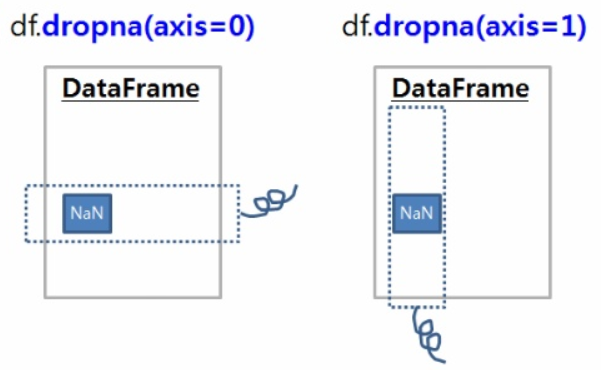

In [30]:
from  IPython.display import Image

Image("dropna_pic.png")

####  내부를 변경하려면 inplace 매개변수로 처리

In [31]:
anime.dropna(inplace=True)

In [32]:
anime.shape

(10228, 7)

### 파일을 검색해서 shape와 count를 비교해보면 결측값에 대한 갯수가 차이가 발생한다.

In [33]:
movie_dropna = pd.read_csv('./data/data/movie.csv')

In [34]:
movie_dropna.shape

(4916, 28)

#### 각 칼럼에 대해 결측값을 확인하고 갯수를 확인한다.

In [35]:
movie_dropna.count()

color                        4897
director_name                4814
num_critic_for_reviews       4867
duration                     4901
director_facebook_likes      4814
actor_3_facebook_likes       4893
actor_2_name                 4903
actor_1_facebook_likes       4909
gross                        4054
genres                       4916
actor_1_name                 4909
movie_title                  4916
num_voted_users              4916
cast_total_facebook_likes    4916
actor_3_name                 4893
facenumber_in_poster         4903
plot_keywords                4764
movie_imdb_link              4916
num_user_for_reviews         4895
language                     4904
country                      4911
content_rating               4616
budget                       4432
title_year                   4810
actor_2_facebook_likes       4903
imdb_score                   4916
aspect_ratio                 4590
movie_facebook_likes         4916
dtype: int64

####  실제 결측값을 확인한다

In [36]:
movie_dropna.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [37]:
movie_dropna.isnull().sum().sum()

2654

In [38]:
movie_dropna['movie_title'].isnull().sum()

0

#### 결측값을 제거한다. inplace=True로 지정해서 내부 객체를 변경한다.

In [39]:
movie_dropna.dropna(inplace=True)

In [40]:
movie_dropna.shape

(3655, 28)

In [41]:
movie_dropna.count()

color                        3655
director_name                3655
num_critic_for_reviews       3655
duration                     3655
director_facebook_likes      3655
actor_3_facebook_likes       3655
actor_2_name                 3655
actor_1_facebook_likes       3655
gross                        3655
genres                       3655
actor_1_name                 3655
movie_title                  3655
num_voted_users              3655
cast_total_facebook_likes    3655
actor_3_name                 3655
facenumber_in_poster         3655
plot_keywords                3655
movie_imdb_link              3655
num_user_for_reviews         3655
language                     3655
country                      3655
content_rating               3655
budget                       3655
title_year                   3655
actor_2_facebook_likes       3655
imdb_score                   3655
aspect_ratio                 3655
movie_facebook_likes         3655
dtype: int64

In [42]:
movie_dropna.isnull().sum().sum()

0

## 5.중복값에 대한 제거

####  파일을 읽는다.

In [43]:
pop_dup = pd.read_csv('./data-USstates/state-population.csv')

In [44]:
pop_dup.count()

state/region    2544
ages            2544
year            2544
population      2524
dtype: int64

In [45]:
pop_dup.head()

state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

#### 중복값을 확인

In [46]:
help(pop_dup.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset=None, keep='first', inplace=False) method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed, optionally only
    considering certain columns
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns
    keep : {'first', 'last', False}, default 'first'
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : boolean, default False
        Whether to drop duplicates in place or to return a copy
    
    Returns
    -------
    deduplicated : DataFrame



In [47]:
pop_dup.duplicated(['state/region']).sum()

2491

#### 중복데이터를 제거하기

In [48]:
pop_dup_drop = pop_dup.drop_duplicates(['state/region'])

In [49]:
pop_dup_drop.head()

state/region     ages  year  population
0             AL  under18  2012   1117489.0
48            AK    total  1990    553290.0
96            AZ  under18  2012   1617149.0
144           AR  under18  1990    620933.0
192           CA  under18  2012   9209007.0

In [50]:
pop_dup_drop.shape

(53, 4)